<a href="https://colab.research.google.com/github/hardsoft-maker/Theoretical_Mechanics/blob/main/BIGHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have a mobile vehicle, which should survive after the track. We have some
predefined trajectory, which is given in y(x) format.
The goal is to pass this trajectory as fast as possible. But at the end of the path, there
is a drop-off. It means that the vehicle should stop in the end.
We have to establish some constraints, such as max tangent acceleration (max power
on the motor), normal acceleration (road adhesion).
How the vehicle should move (speed and acceleration) for solving such a task?

### Parameters

$a_{t_{max}} = 2\small{m/s^2}\\
a_{n_{max}} = 3\small{m/s^2}\\
v_{max} = 3\small{m/s}\\
y(x) = Axln(\frac{x}{B})\\
\text{where } A = 3,\ B = 5, x \text{ exists on } [0\dots4]
$

To minimise total travel time either $a_t$, $a_n$, or $v$ must equal to it's maximum.
Let's find their relations for each point on the path.

In fact at any point on the path we are only limited by $a_t$ and $v$ notice that $a_t ∼ v^2$, while $a_n$ shows how fast we can change $v$.
$a_t = \frac{v^2}{r}$, where $r(x) = \left| \frac{\left(1+y(x)^{\prime\ 2}\right)^\frac{2}{3}}{y(x)^{\prime\prime}} \right|$ is a radius of curvature at point $x$.

We can derive 2 constraints for $v$ :
$
\begin{cases}
a_t \le 2 \small{m/s^2};\\
v \le 3 \small{m/s};
\end{cases}
$
$$
\begin{cases}
v^2 / r \le 2 \small{m/s^2};\\
v \le 3 \small{m/s};
\end{cases}
\\
\begin{cases}
v \le \sqrt{ a_{t_{max}} * \left| \frac{\left(1+y(x)^{\prime\ 2}\right)^\frac{2}{3}}{y(x)^{\prime\prime}} \right|};\\
v \le v_{max};
\end{cases}
$$
* $y(x) = 3xln(\frac{x}{5})$
* $\dot y(x) = 3(ln(\frac{x}{5})+1)$
* $\ddot y(x) = \frac{3}{x}$

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import animation
from matplotlib.pyplot import figure
from math import *

In [88]:
def y(x):
  return 3*x*np.log(x/5)
def yd(x):
  return 3*(np.log(x/5)+1)
def ydd(x):
  return 3/x
x0 = 0
x1 = 4
dx = 0.001
X = np.arange(x0, x1, dx)
Y = y(X)
Yd = yd(X)
Ydd = ydd(X)
an_max = 3
v_max = 1
def r(x):
  return np.abs((1+yd(x)**2)**(1.5)/(ydd(x)))

<ipython-input-88-e15247581cd6>:2: RuntimeWarning: divide by zero encountered in log
  return 3*x*np.log(x/5)
<ipython-input-88-e15247581cd6>:2: RuntimeWarning: invalid value encountered in multiply
  return 3*x*np.log(x/5)
<ipython-input-88-e15247581cd6>:4: RuntimeWarning: divide by zero encountered in log
  return 3*(np.log(x/5)+1)
<ipython-input-88-e15247581cd6>:6: RuntimeWarning: divide by zero encountered in divide
  return 3/x


<ipython-input-88-e15247581cd6>:4: RuntimeWarning: divide by zero encountered in log
  return 3*(np.log(x/5)+1)
<ipython-input-88-e15247581cd6>:6: RuntimeWarning: divide by zero encountered in divide
  return 3/x
<ipython-input-88-e15247581cd6>:17: RuntimeWarning: invalid value encountered in divide
  return np.abs((1+yd(x)**2)**(1.5)/(ydd(x)))


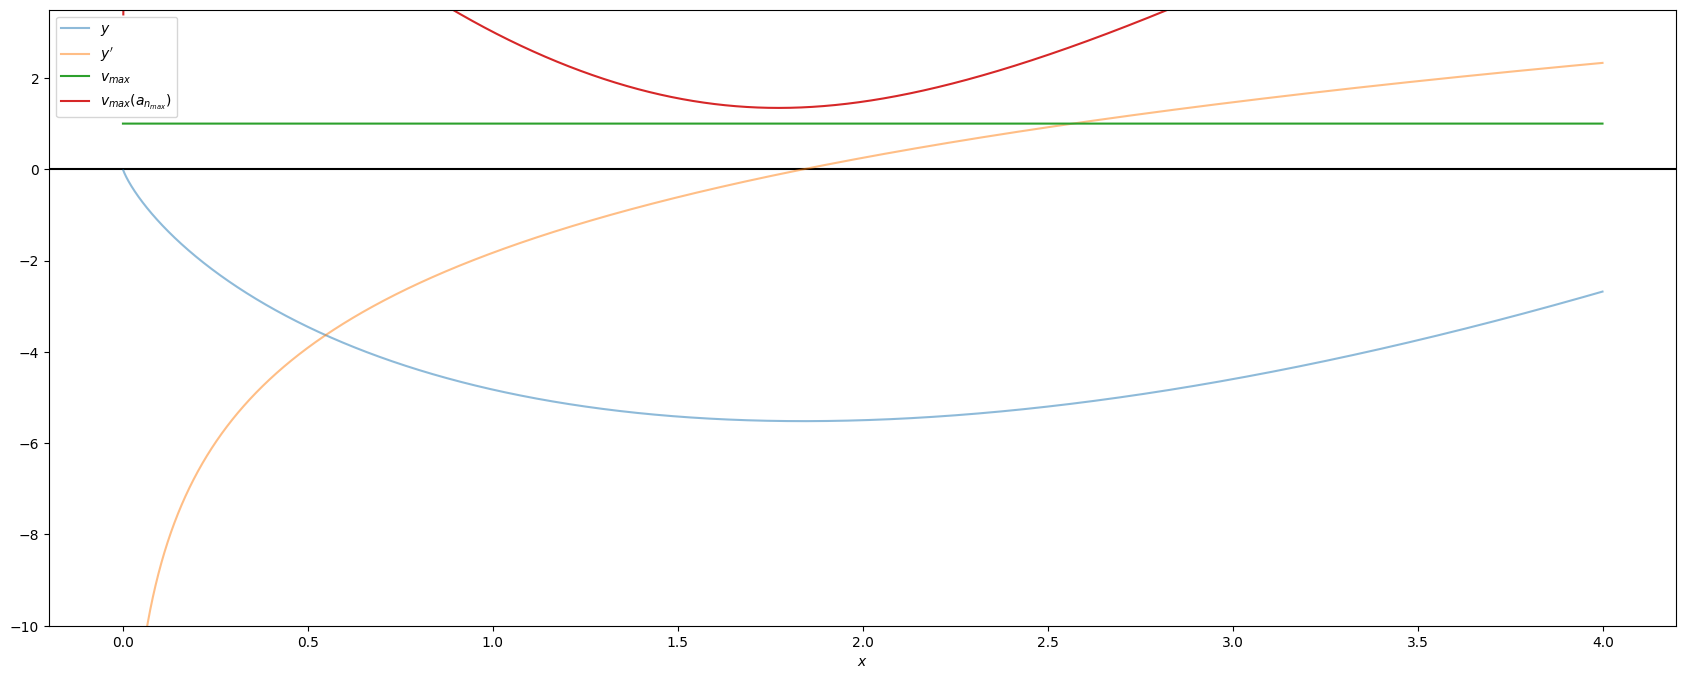

In [89]:
fig = plt.figure(figsize=(21,8))
ax1 = plt.subplot(1,1,1)
ax1.set_xlabel(r'$x$')
ax1.axhline(y=0, color='k')

ax1.plot(X, Y, alpha=0.5, label=r'$y$')
ax1.plot(X, Yd, alpha=0.5, label=r'$y^\prime$')
ax1.set_ylim(-10, max(*Yd, v_max)*1.5)
ax1.plot(X, [v_max]*len(X), label=r'$v_{max}$')
ax1.plot(X, np.sqrt(an_max*r(X)), label=r'$v_{max}(a_{n_{max}}$)')
ax1.legend()

In [90]:
def vmax(x):
  return min(v_max, np.sqrt(an_max*r(x)))

over here we divide the trajectory into several parts considered linear as small as possible which would allow us to use the pythagorean theorem to find the approximate time needed to travel from point point A to B . For each small path we would want to find either it is needed to increase tangential acceleration or keep it the same or lower it depending on our constraints.  the Relation below was used $v_{f}^2 - v_{0}^2 = 2 a s$

In [91]:
x0 = 1e-10
dx = 1e-5
l=0
v=0
t=0
at=2
yplot =[]
xplot = []
tplot= []
vplot = []
atplot = []
anplot= []
while v < vmax(x0):
  yplot += [y(x0)]
  xplot += [x0]
  tplot += [t]
  vplot += [v]
  anplot += [v**2 / r(x0)]
  dy = y(x0 + dx) - y(x0)
  ds = (dx **2 + dy ** 2) ** 0.5
  vf = (2 * 2 * ds + v**2)**0.5
  x0 += dx
  t += (vf - v)/at
  v = vf
  atplot += [at]
  l += ds

Same thing here but we'r estarting from the other end of the path at $x=4$

In [92]:
x1=4
v1=0
while v1 < vmax(x1):
  dy = y(x1 - dx) - y(x1)
  ds = (dx **2 + dy ** 2) ** 0.5
  vf = (2 * 2 * ds + v1**2)**0.5
  x1 -= dx
  v1 = vf

Compute the time needed, accelerations and velocities for the middle part of the trajectory.


Curve length is:  9.803165416551586
Time needed is:  10.293816646478472


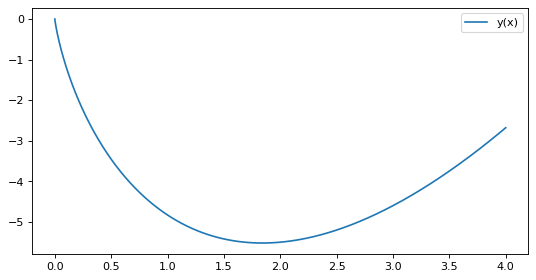

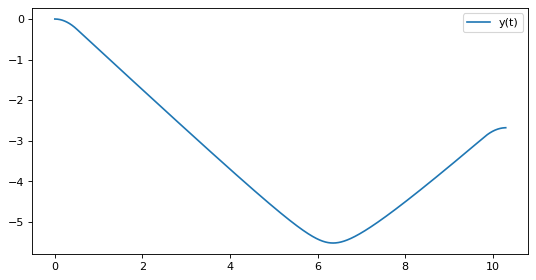

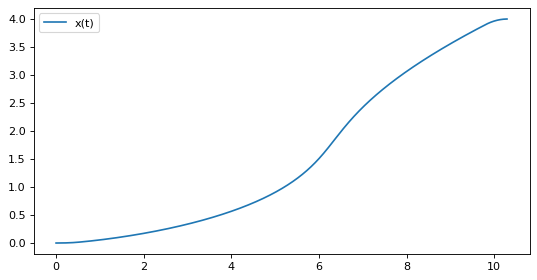

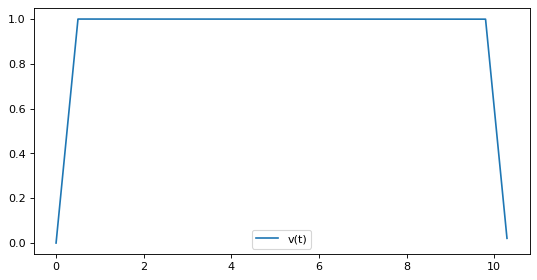

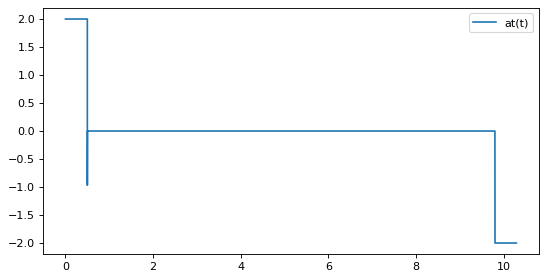

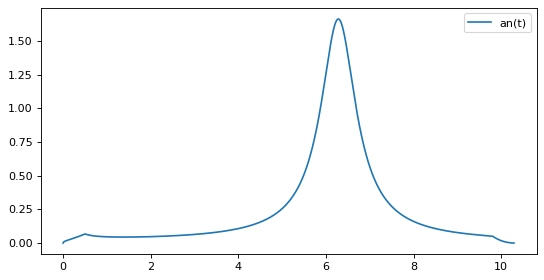

In [93]:
while x0 < x1:
  yplot += [y(x0)]
  xplot += [x0]
  tplot += [t]
  vplot += [v]
  anplot += [v*v / r(x0)]
  dy = y(x0 + dx) - y(x0)
  ds = (dx **2 + dy ** 2) ** 0.5
  dvpotential = (2 * 2 * ds + v**2)**0.5 - v
  dv = vmax(x0 + dx) - v
  vf = 0
  if dv < 0:
    vf = v + dv
  else:
    vf = min(dvpotential,dv) + v
  a = abs(vf**2 - v**2) / (2 * ds)
  atplot += [(vf**2 - v**2) / (2 * ds)]
  if a == 0:
    t += ds / v
  else :
    t += abs((vf - v)) / a
  v = vf
  l += ds
  x0 += dx
while x0 < 4:
  yplot += [y(x0)]
  xplot += [x0]
  tplot += [t]
  vplot += [v]
  anplot += [v*v / r(x0)]
  dy = y(x0 - dx) - y(x0)
  ds = (dx **2 + dy ** 2) ** 0.5
  vf = (2 * 2 * ds + v**2)**0.5
  x0 += dx
  t += (vf - v)/at
  v -= vf - v
  atplot += [-at]
  l += ds
figure(figsize=(8, 4), dpi=80)
plt.plot(xplot,yplot,label = "y(x)")
plt.legend()
figure(figsize=(8, 4), dpi=80)
plt.plot(tplot,yplot,label = "y(t)")
plt.legend()
figure(figsize=(8, 4), dpi=80)
plt.plot(tplot,xplot,label = 'x(t)')
plt.legend()
figure(figsize=(8, 4), dpi=80)
plt.plot(tplot,vplot,label = 'v(t)')
plt.legend()
figure(figsize=(8, 4), dpi=80)
plt.plot(tplot,atplot,label = 'at(t)')
plt.legend()
figure(figsize=(8, 4), dpi=80)
plt.plot(tplot,anplot,label = 'an(t)')
plt.legend()
print("Curve length is: ", l)
print("Time needed is: ", t)
